THIS NOTEBOOK PRODUCES THE KINEMATIC MAPS AND RGB IMAGES AND SAVES THEM INTO A PDF FILE 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import BoundaryNorm
from astropy.io import fits
from matplotlib import ticker
from pathlib import Path
import os
from matplotlib.backends.backend_pdf import PdfPages
import math
import matplotlib.image as mpimg
from astropy.visualization import make_lupton_rgb
from astropy.visualization import SqrtStretch
from astropy.visualization import ZScaleInterval
import glob

In [2]:
# os.getcwd()

In [3]:
# os.chdir('2021/Honours Project/SAMI DATA')

In [2]:
CAT = fits.open('jvds_stelkin_cat_v012_mge_seecorr_kh20_v150121_private-Copy1.fits')

In [3]:
CATID = CAT[1].data['CATID']
SIGMA_RE = CAT[1].data['SIGMA_RE']
LMSTAR = CAT[1].data['LMSTAR']
RE_CIRC_KPC = CAT[1].data['RE_CIRC_KPC']
MSOLAR = 1.98892e30
G = 6.67300e-11
kpctom = 3.08568025e19

In [4]:
def SIGMA_STAR_CALC(LMSTAR_VAL, RE_CIRC_VAL):
    return math.sqrt(((10**LMSTAR_VAL)*MSOLAR*G)/(RE_CIRC_VAL*kpctom*5))/(1e3)

In [5]:
SIGMA_STAR = []
for i in range(LMSTAR.size):
    SIGMA_STAR += [SIGMA_STAR_CALC(LMSTAR[i],RE_CIRC_KPC[i])]
    
SIGMA_STAR = np.array(SIGMA_STAR)

In [6]:
NANS_SIGMA_RE = np.argwhere(np.isnan(SIGMA_RE))
SIGMA_STAR_1 = SIGMA_STAR[NANS_SIGMA_RE]
SIGMA_RE[NANS_SIGMA_RE] = SIGMA_STAR_1

In [10]:
KIN_MTYPE = CAT[1].data["KIN_MTYPE"]

In [31]:
os.chdir('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\02_sdss_clusters')
SDSS_IMAGE_FILES = glob.glob('*.fits')

In [32]:
os.chdir('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\two_moments')

In [11]:
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "kids_imaging.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
#     zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

Extracting all the files now...
Done!


In [33]:
SAMI_FITS = glob.glob("*.fits")

In [34]:
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = [25,6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({"text.usetex": False})
plt.rcParams.update({'font.size': 14})

In [39]:
os.chdir('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\two_moments')

C:\Users\hepbu\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
C:\Users\hepbu\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
C:\Users\hepbu\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less


Wall time: 6.54 s


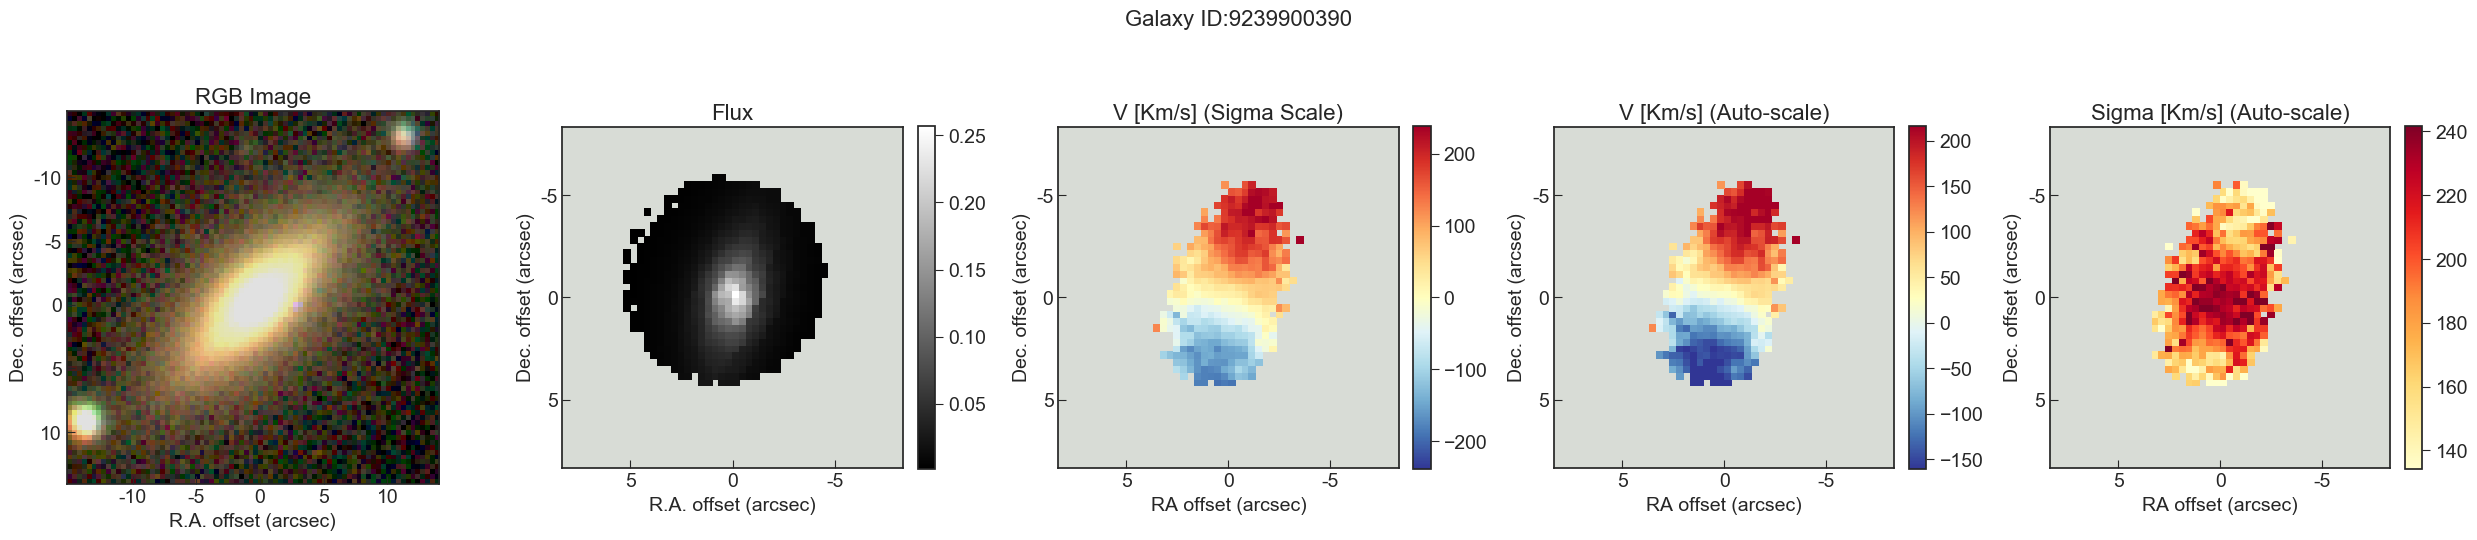

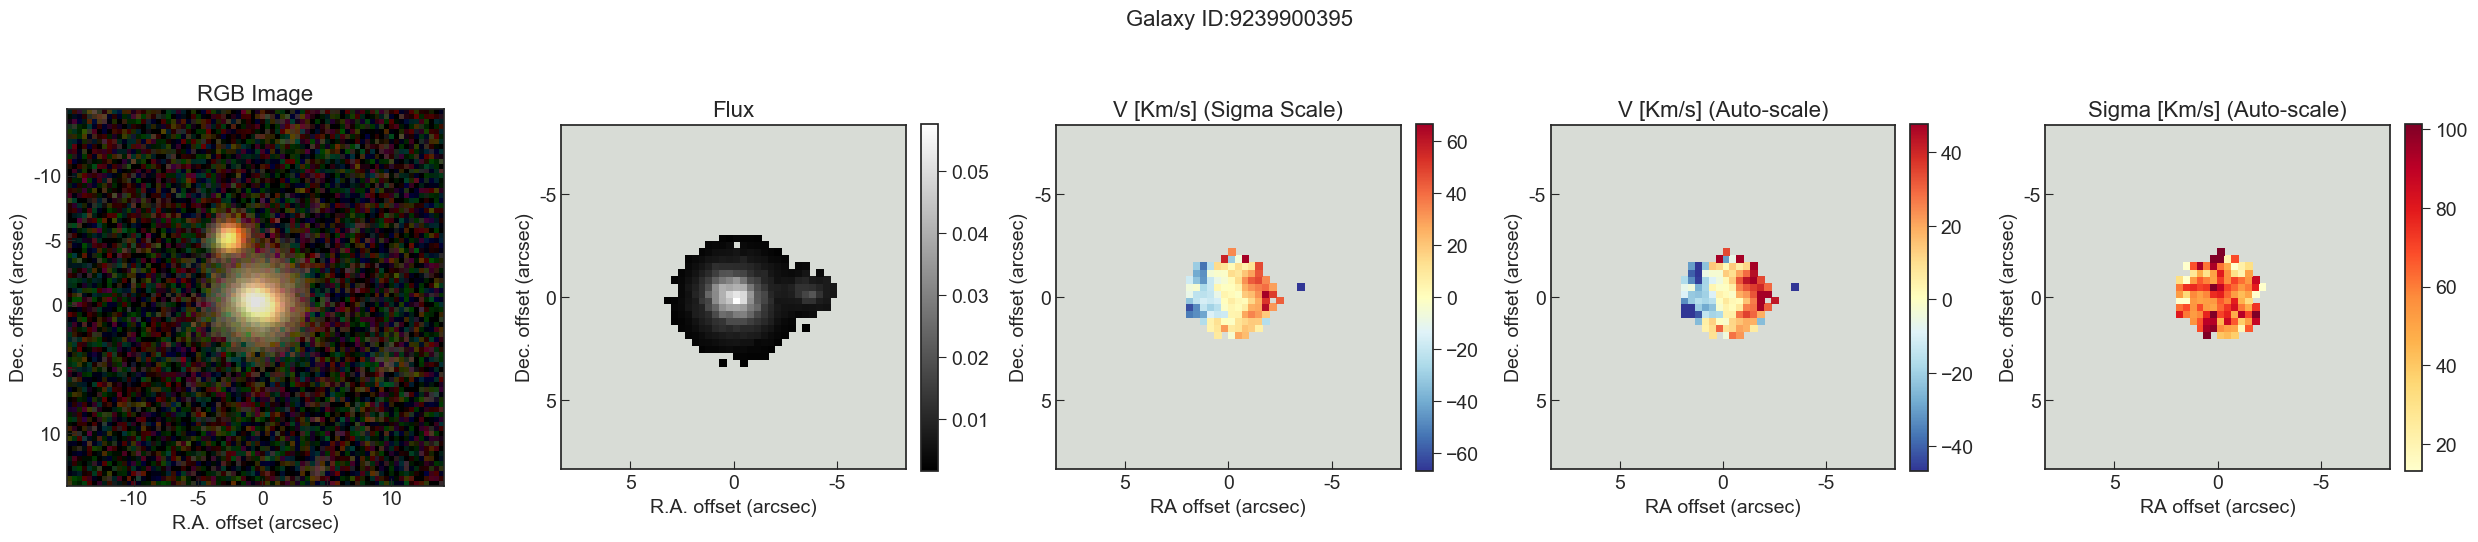

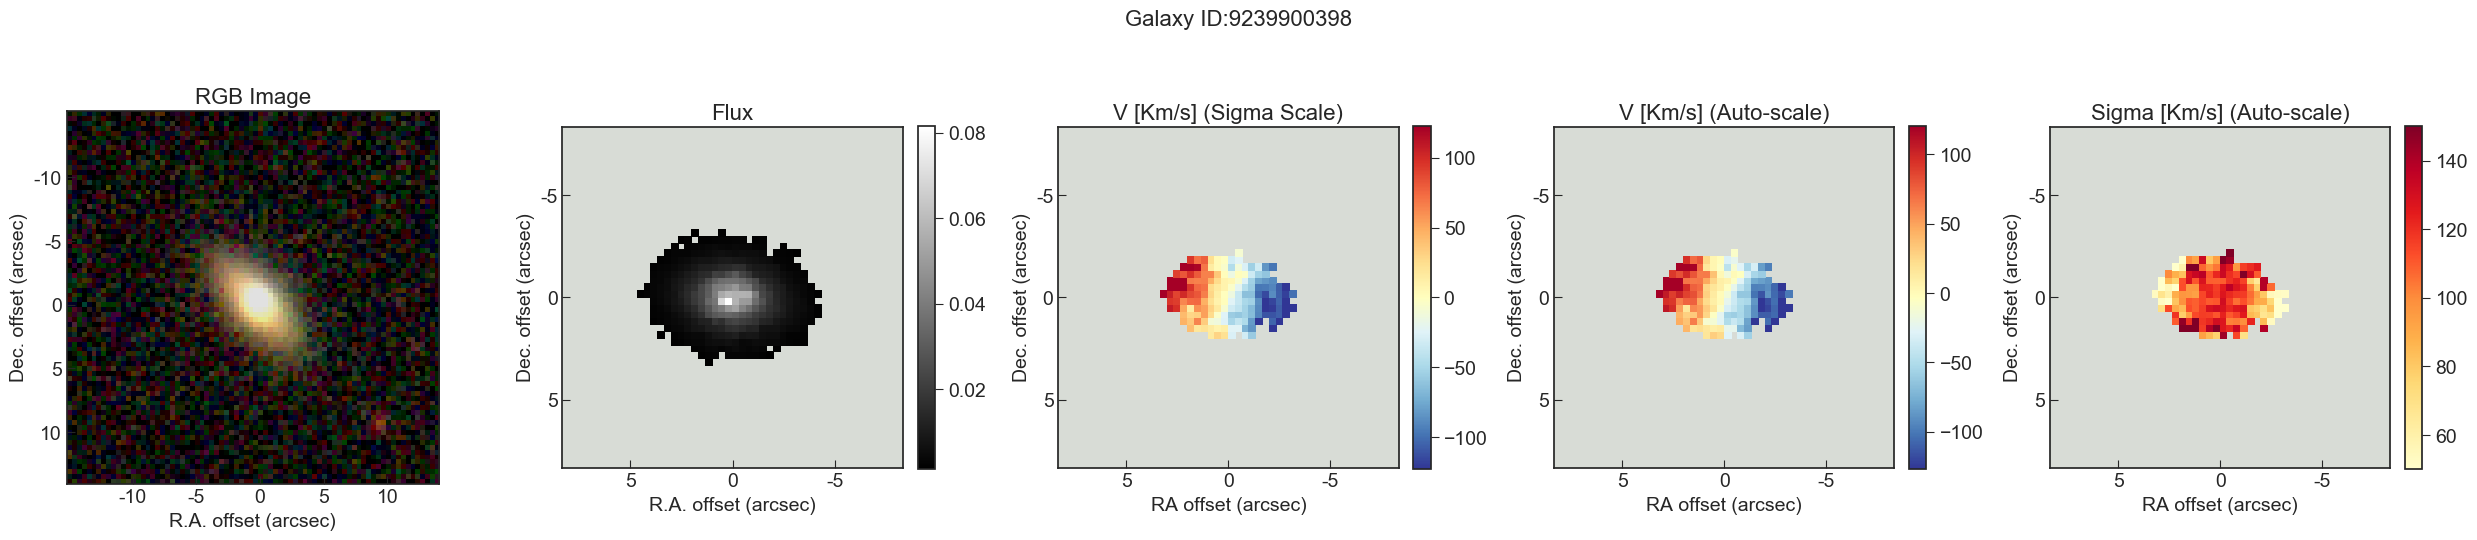

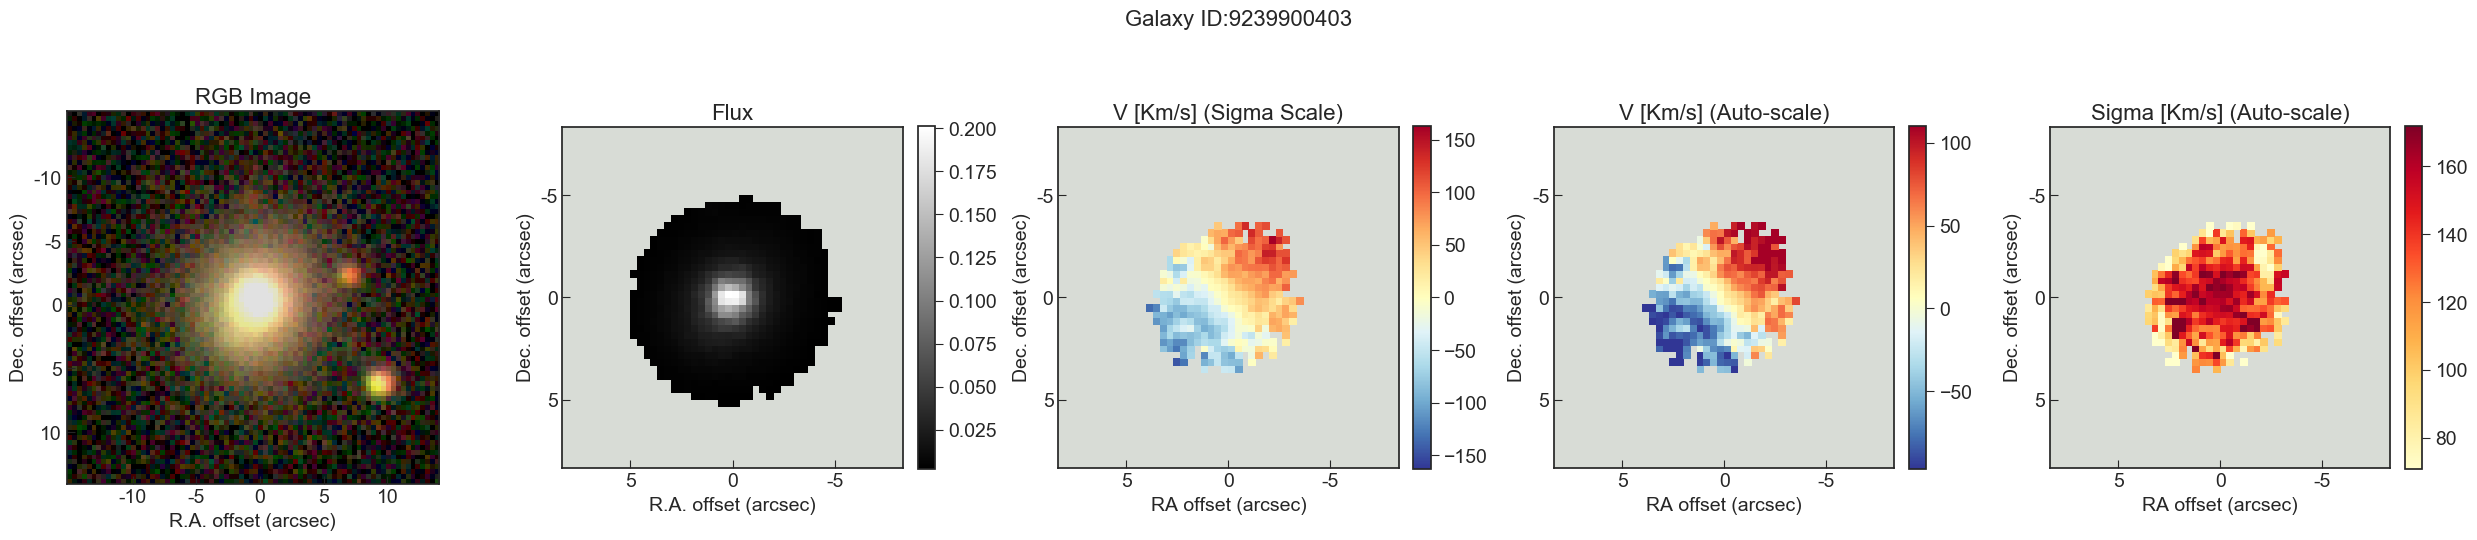

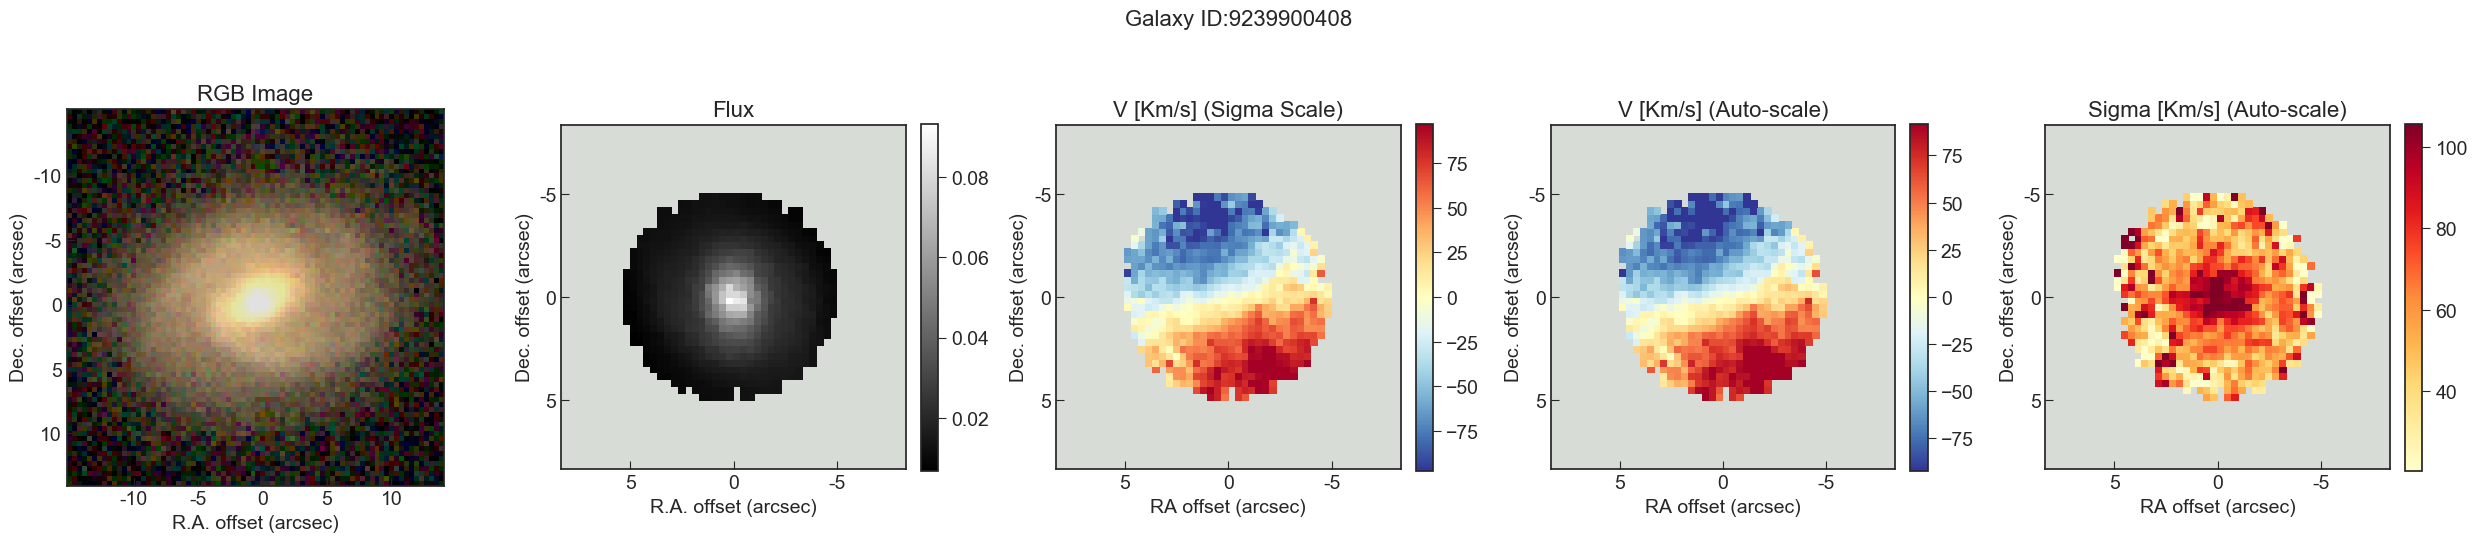

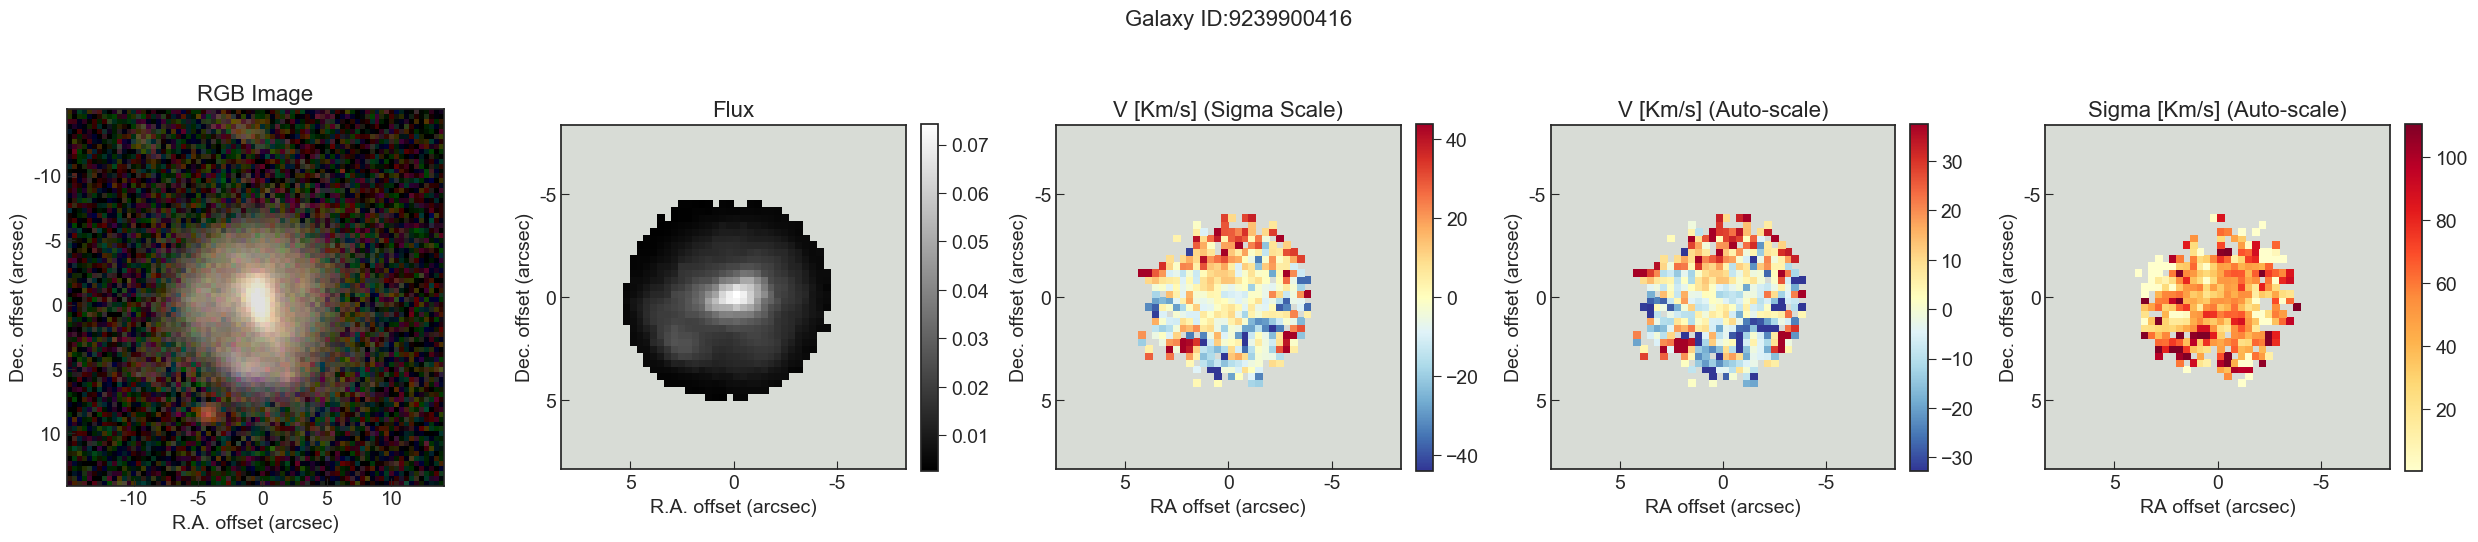

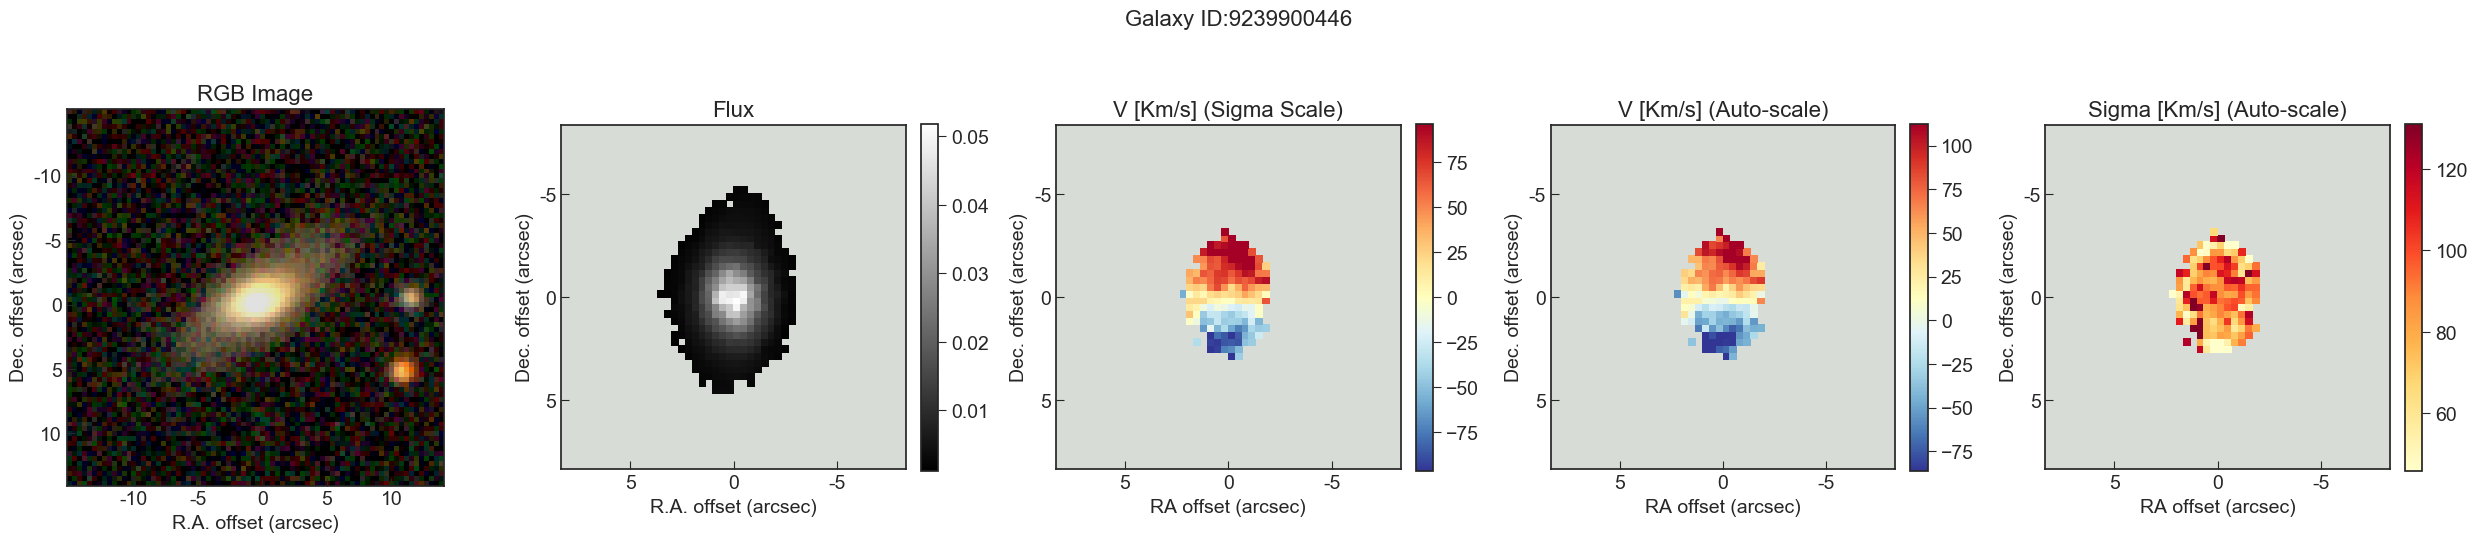

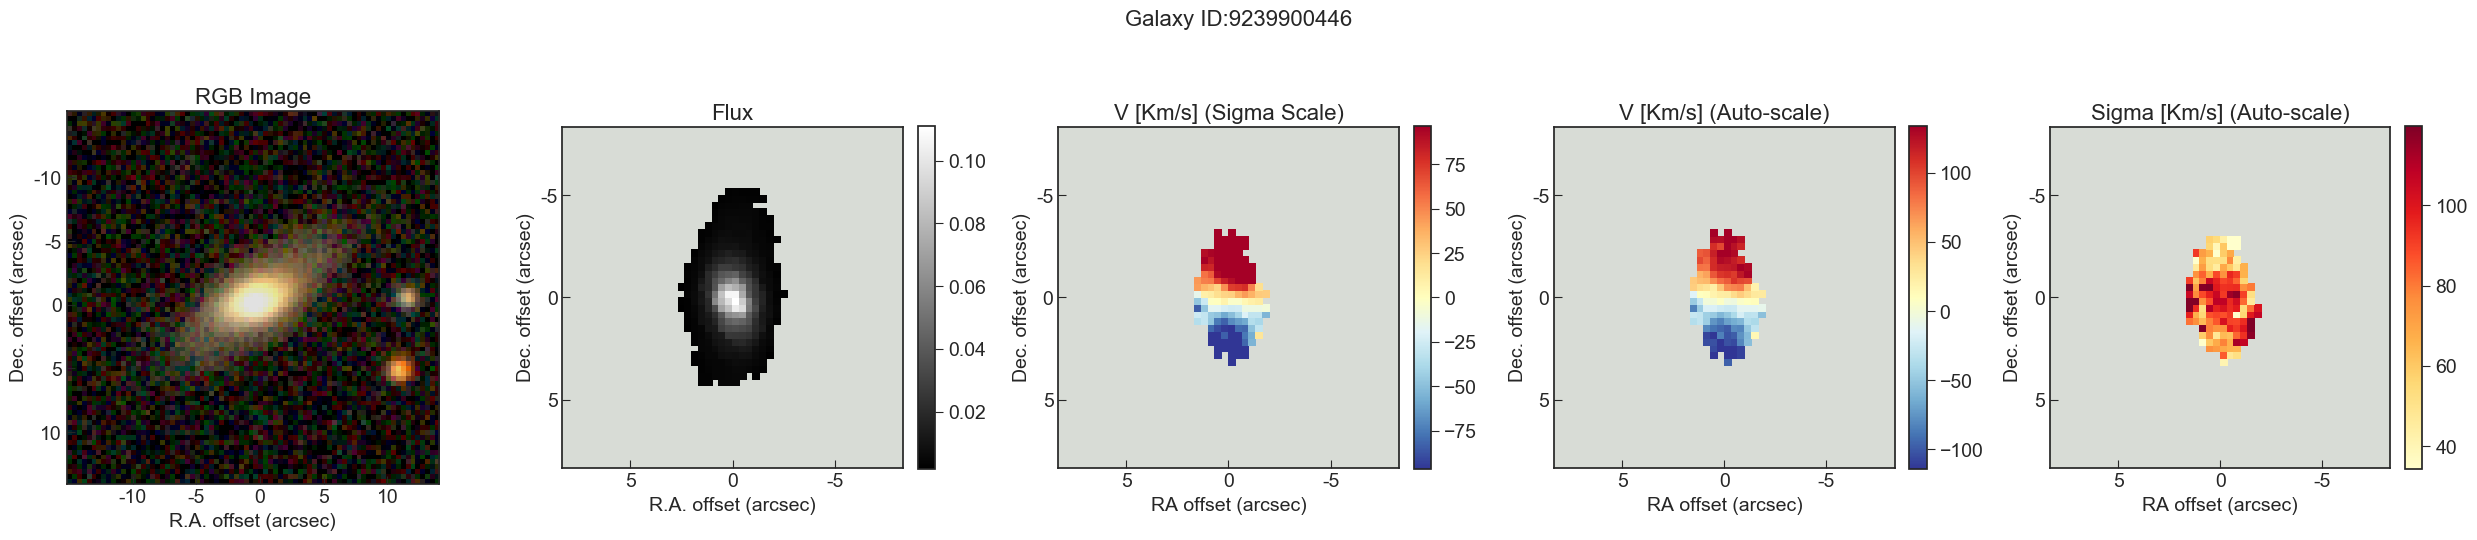

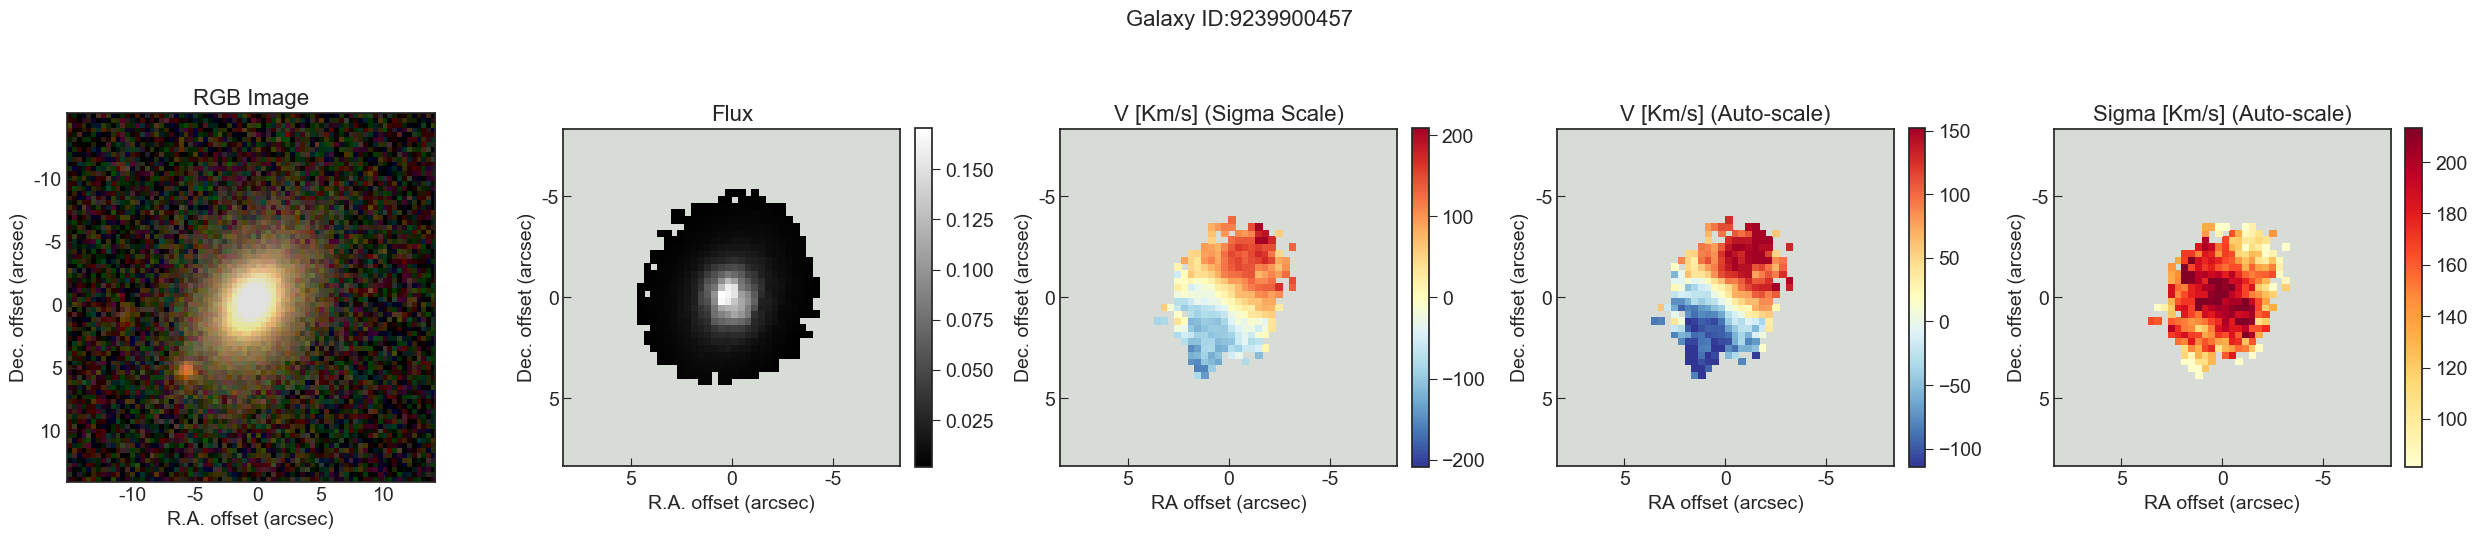

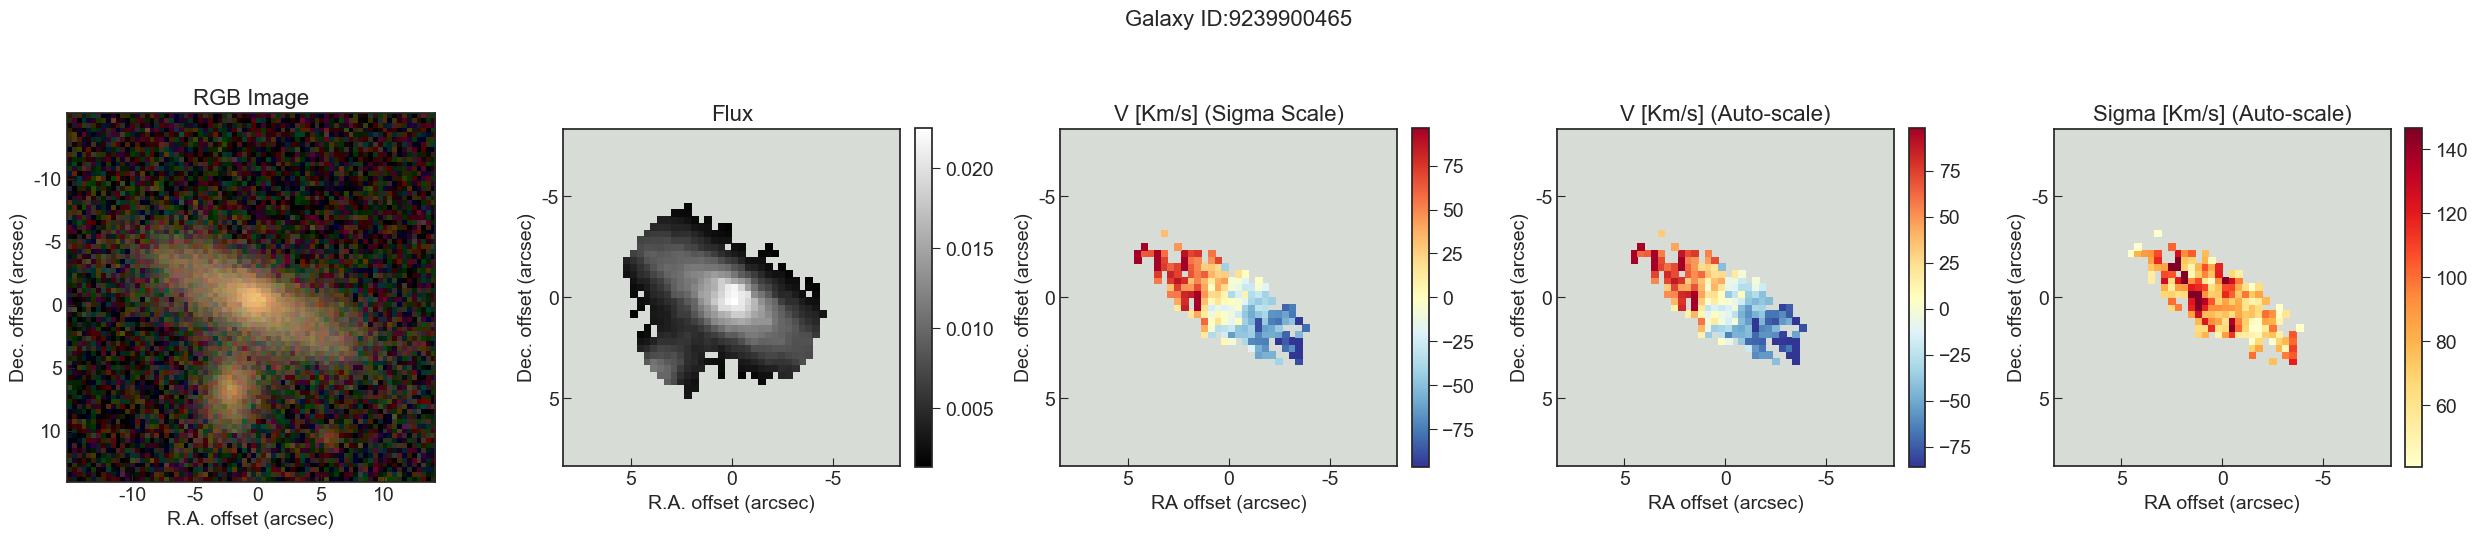

In [88]:
%%time
#Open slices and select good quality spaxels by applying limits (ignore errors)#


pp = PdfPages('multipage_attempt34.pdf')


for a in range (3100,3110):
    os.chdir('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\two_moments')
    data_folder = Path()
    file_to_open = data_folder / SAMI_FITS[a]
    hdul = fits.open(file_to_open)
    FLUX = hdul[1].data
    VMAP = hdul[3].data
    VEL_ERR = hdul[4].data
    SIG = hdul[5].data
    SIG_ERR = hdul[6].data
    
    FLUX_GOOD = np.swapaxes(FLUX,0,1)
    
    QC = hdul[8].data
    SNR = QC[:,:,3]
    
    SNR_GOOD = np.where(SNR > 3, 1, np.NaN)
    SIG_ERR_GOOD = np.where(SIG_ERR < SIG*0.1 +25, 1, np.NaN)
    VEL_ERR_GOOD = np.where(VEL_ERR < 30, 1, np.NaN)
    
    SIG_1 = np.multiply(SIG,SIG_ERR_GOOD)
    SIG_GOOD = np.multiply(SIG_1,SNR_GOOD)
    SIG_BOTH = np.multiply(SIG_GOOD, VEL_ERR_GOOD)
    
    VMAP_1 = np.multiply(VMAP,VEL_ERR_GOOD)
    VMAP_2 = np.multiply(VMAP_1,SNR_GOOD)
    VMAP_BOTH = np.multiply(VMAP_2, SIG_ERR_GOOD)
    
    VMAP_CENTRE = VMAP_2[23:26,23:26]
    MEDIAN = np.nanmedian(VMAP_CENTRE)
    VMAP_GOOD = VMAP_2 - MEDIAN
    
    CATID1 = int(hdul[0].header[14])
    x = np.where(CATID == CATID1)
    y = np.nanmax(x)
    SIGMA_SCALE = SIGMA_RE[y]
    
    if np.isnan(SIGMA_SCALE) == True:
        SIGMA_SCALE = np.nanpercentile(VMAP_GOOD,95)
    else:
        SIGMA_SCALE = SIGMA_SCALE
    
    fig, axs = plt.subplots(1,5)
    fig.suptitle('Galaxy ID:' + str(CATID1) , fontsize=16)
    
#     Add an if statement and unzip the file with a similar file name setup
    
    img_file_name = 'kids_imaging/' + str(CATID1) + '_rgb.png'
    
    fits_file_name = str(CATID1) + '_sdss_60.fits'
    
    #Add a try except block or similar in here to generate image from correct source
    
    if CATID1 < 4e6:
    
        try:
            with ZipFile('kids_imaging.zip') as myzip:
                with myzip.open(img_file_name) as myfile:
                    img = mpimg.imread(img_file_name)
                    img = img[75:225,75:225]
        except:
            img = mpimg.imread('No_image_available.png')
            
    else:
        try:
            os.chdir('C:\\Users\\hepbu\\Documents\\2021\\Honours Project\\SAMI DATA\\02_sdss_clusters')
            hdul_img = fits.open(fits_file_name)
            
            forCasting = np.float_()

            g = hdul_img[1].data
            r = hdul_img[2].data
            i = hdul_img[3].data
            
            g = np.array(g,forCasting)
            r = np.array(r,forCasting)
            i = np.array(i,forCasting)

            g = g[0:152, 0:152]
            r = r[0:152, 0:152]
            i = i[0:152, 0:152]

            g = g[38:114, 38:114]
            r = r[38:114, 38:114]
            i = i[38:114, 38:114]

            stretch = SqrtStretch() 

            g = stretch(g)
            r = stretch(r)
            i = stretch(i)

            rgb_default = make_lupton_rgb(i ,r ,g, Q= 1, stretch = 1)
#             img = np.swapaxes(rgb_default,0,1)
            img = rgb_default
                  
        except:
            img = mpimg.imread('No_image_available.png')
    
    ab = np.shape(img)
    inc = round(ab[0]/6)
    
    I = axs[0].imshow(img)
    axs[0].set_title('RGB Image', fontsize = 16)
    axs[0].set_xlabel('R.A. offset (arcsec)', fontsize = 14)
    axs[0].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
    axs[0].set_aspect('equal', 'box')
    axs[0].set_facecolor('xkcd:light grey')
    axs[0].set_xticks([inc,2*inc,3*inc,4*inc,5*inc])
    axs[0].set_xticklabels([-10, -5, 0, 5, 10])
    axs[0].set_yticks([inc,2*inc,3*inc,4*inc,5*inc])
    axs[0].set_yticklabels([-10, -5, 0, 5, 10])
    axs[0].tick_params(direction = 'in')
   
    F = axs[1].pcolor(FLUX, cmap = 'gray')
    axs[1].set_title('Flux', fontsize = 16)
    axs[1].set_xlabel('R.A. offset (arcsec)', fontsize = 14)
    axs[1].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
    fig.colorbar(F, ax=axs[1], fraction=0.046, pad=0.04)
    axs[1].set_aspect('equal', 'box')
    axs[1].set_facecolor('xkcd:light grey')
    axs[1].set_xticks([10, 25, 40])
    axs[1].set_xticklabels([5, 0, -5])
    axs[1].set_yticks([10, 25, 40])
    axs[1].set_yticklabels([5, 0, -5])
    axs[1].tick_params(direction = 'in')
    
    D = axs[2].pcolor(VMAP_GOOD, cmap= 'RdYlBu_r', vmax = SIGMA_SCALE, vmin = -SIGMA_SCALE)
    axs[2].set_title('V [Km/s] (Sigma Scale)', fontsize = 16)
    axs[2].set_xlabel('RA offset (arcsec)', fontsize = 14)
    axs[2].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
    fig.colorbar(D, ax=axs[2], fraction=0.046, pad=0.04)
    axs[2].set_aspect('equal', 'box')
    axs[2].set_facecolor('xkcd:light grey')
    axs[2].set_xticks([10, 25, 40])
    axs[2].set_xticklabels([5, 0, -5])
    axs[2].set_yticks([10, 25, 40])
    axs[2].set_yticklabels([5, 0, -5])
    axs[2].tick_params(direction = 'in')
    
    D2 = axs[3].pcolor(VMAP_GOOD, cmap= 'RdYlBu_r', vmax = np.nanpercentile(VMAP_GOOD,95),
                       vmin = np.nanpercentile(VMAP_GOOD,5))
    axs[3].set_title('V [Km/s] (Auto-scale)', fontsize = 16)
    axs[3].set_xlabel('RA offset (arcsec)', fontsize = 14)
    axs[3].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
    fig.colorbar(D2, ax=axs[3], fraction=0.046, pad=0.04)
    axs[3].set_aspect('equal', 'box')
    axs[3].set_facecolor('xkcd:light grey')
    axs[3].set_xticks([10, 25, 40])
    axs[3].set_xticklabels([5, 0, -5])
    axs[3].set_yticks([10, 25, 40])
    axs[3].set_yticklabels([5, 0, -5])
    axs[3].tick_params(direction = 'in')

    V = axs[4].pcolor(SIG_BOTH, cmap= 'YlOrRd', vmin = np.nanpercentile(SIG_BOTH, 5), vmax = np.nanpercentile(SIG_BOTH, 95))
    axs[4].set_title('Sigma [Km/s] (Auto-scale)', fontsize = 16)
    axs[4].set_xlabel('RA offset (arcsec)', fontsize = 14)
    axs[4].set_ylabel('Dec. offset (arcsec)', fontsize = 14)
    axs[4].set_aspect('equal', 'box')
    fig.colorbar(V, ax=axs[4], fraction=0.046, pad=0.04)
    axs[4].set_facecolor('xkcd:light grey')
    axs[4].set_xticks([10, 25, 40])
    axs[4].set_xticklabels([5, 0, -5])
    axs[4].set_yticks([10, 25, 40])
    axs[4].set_yticklabels([5, 0, -5])
    axs[4].tick_params(direction = 'in')
    
    plt.tight_layout()
    os.chdir('C:\\Users\\hepbu\\Documents\\2021\\Honours Project')
    pp.savefig()
    
pp.close()

    

In [51]:
round(37.7)

38